# I. Introduction

## Background
Understanding our customer is a must in the crowded competition recent days. Maintaining and improving our customer could lengthen their lifetime period with higher quality transactions. This project focuses on the segmentation of credit card holders based on their behavioral patterns and distinct characteristics.

## Objective
The objective of this clustering is to identify the most effective, personalized strategies for increasing credit card usage frequency across different consumer segments.

## Dataset Background
The analysis utilizes an internal corporate dataset, which encompasses comprehensive consumer credit card transaction data collected over a six-month period.

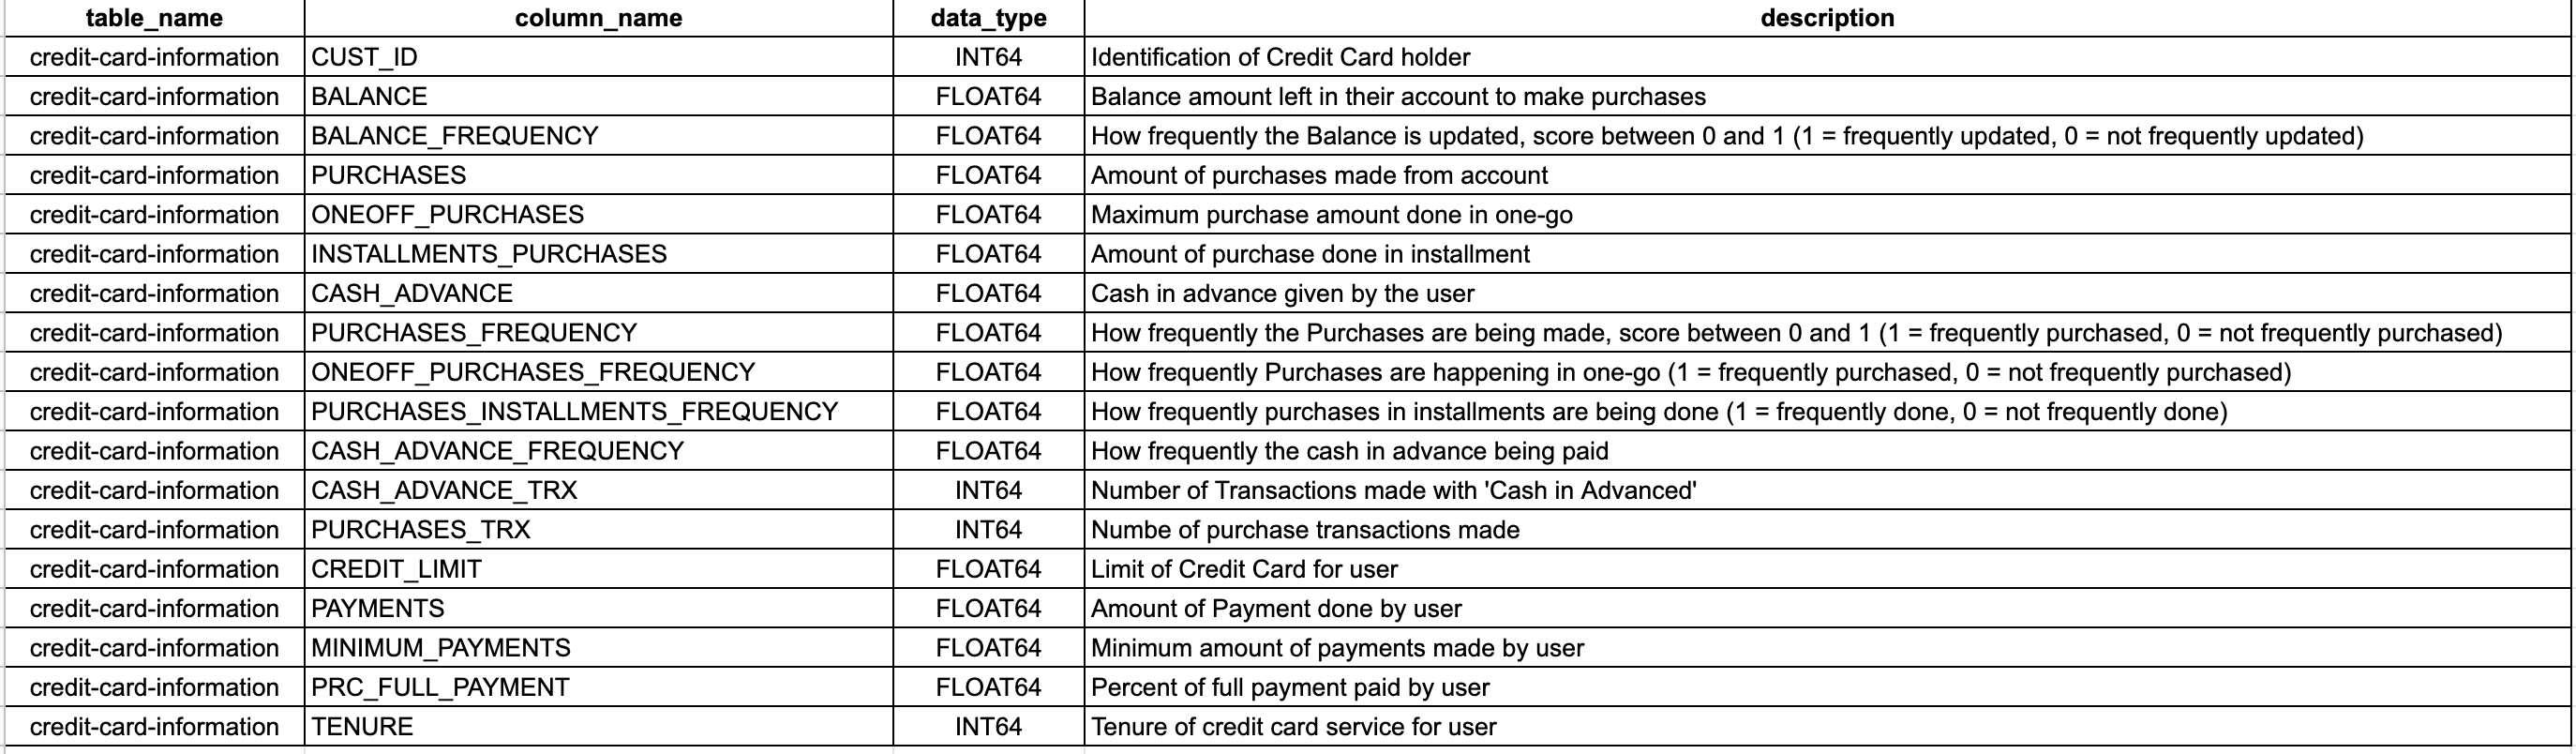

# II. Import Libraries

In [155]:
import pandas as pd                                                             # For Preprocessing
import numpy as np                                                              # For Numerical Operation
import seaborn as sns                                                           # For Visualization
import matplotlib.pyplot as plt                                                 # For Visualization
from sklearn.preprocessing import MinMaxScaler                                  # For Scaling and Encoding
from sklearn.impute import KNNImputer                                           # For Imputating Missing Value
from sklearn.compose import ColumnTransformer                                   # For Pipelining
from sklearn.preprocessing import FunctionTransformer                           # For Pipelining
from sklearn.pipeline import make_pipeline                                      # For Pipelining
from feature_engine.outliers import Winsorizer                                  # For Capping (Handling Outliers)
from sklearn.cluster import KMeans                                              # For Clustering
from sklearn.decomposition import PCA                                           # For Dimensionality Reduction
import matplotlib.cm as cm                                                      # For Visualization
from sklearn.metrics import silhouette_score,silhouette_samples                 # For Determining Number of Cluster
import dill                                                                     # For Reading Model
from scipy.stats import spearmanr                                               # For Correlation Analysis

# III. Data Loading

In [156]:
# Load Data
df=pd.read_csv('dataset.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1987,21.881528,1.000000,89.04,89.04,0.0,0.0,0.083333,0.083333,0.0,0.0,0,1,2500.0,193.985335,96.885791,0.0,12
1,2973,36.567901,0.090909,1098.31,1098.31,0.0,0.0,0.083333,0.083333,0.0,0.0,0,1,4800.0,0.000000,NaN,0.0,12
2,4903,8.570991,0.272727,149.55,149.55,0.0,0.0,0.083333,0.083333,0.0,0.0,0,1,5000.0,447.377119,97.176376,0.0,12
3,7431,1409.206763,1.000000,143.50,143.50,0.0,0.0,0.083333,0.083333,0.0,0.0,0,1,3000.0,432.361276,300.764907,0.0,12
4,7979,810.739995,1.000000,86.90,86.90,0.0,0.0,0.083333,0.083333,0.0,0.0,0,1,7500.0,253.775702,210.961925,0.0,12


In [157]:
# Check data's summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

From the information above, data type's features is correct

In [158]:
# Check duplicate row
df.duplicated().sum()

0

In [159]:
# Check standard missing values
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [160]:
# Check data aggregation
df.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4320.000000,4475.000000,4475.000000
mean,4475.000000,1563.205717,0.876933,1003.251343,596.369893,407.110215,984.288554,0.490579,0.202301,0.363886,0.136132,3.301229,14.929162,4494.878630,1740.075430,873.976757,0.150224,11.518212
std,2583.931114,2072.045789,0.238222,2060.034730,1653.425984,880.799744,2060.448056,0.402907,0.298203,0.397603,0.201036,7.134727,25.540814,3609.267706,2827.633858,2436.877272,0.289081,1.328925
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,2238.000000,124.432849,0.888889,39.560000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,376.913051,168.590144,0.000000,12.000000
50%,4475.000000,871.355430,1.000000,360.000000,45.650000,88.620000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,877.494612,313.980229,0.000000,12.000000
75%,6712.000000,2047.570799,1.000000,1102.420000,575.220000,455.885000,1138.887754,0.916667,0.250000,0.750000,0.250000,4.000000,17.000000,6500.000000,1911.596530,819.371080,0.125000,12.000000
max,8949.000000,18495.558550,1.000000,41050.400000,40624.060000,14686.100000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,347.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


From the information above, we can see that:
1. There is no negative value
2. BALANCE_FREQUENCY, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, PRC_FULL_PAYMENT columns are filled by ratio number (0-1) so we use  but on CASH_ADVANCE_FREQUENCY there is the max value up to 1.5 so that we need check it further.
3. TENURE's columns is indicated as discrete columns, so that we need further check


In [161]:
# Check "TENURE" discrete column or not
df['TENURE'].value_counts()

TENURE
12    3777
11     199
10     122
6      101
8       99
7       90
9       87
Name: count, dtype: int64

From the information above, this column is contained with discrete values. Therefore, we will scale it using MinMaxScaler since it has a relative distance and no likelihood to have normal distribution. If there is any likelihood having normal distribution, it should use StandardScaler.

In [162]:
# Check potential extreme outlier
df.sort_values(by='CASH_ADVANCE_FREQUENCY').tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3429,6539,2648.244646,1.0,0.00,0.00,0.00,10458.978150,0.000000,0.000000,0.000000,1.000000,123,0,4000.0,9818.531412,665.888853,0.000000,12
982,7677,6956.376540,1.0,11500.94,3091.01,8409.93,15133.532130,1.000000,1.000000,1.000000,1.000000,48,308,14000.0,20122.005450,1617.014574,0.166667,12
4370,5199,9601.071318,1.0,238.34,0.00,238.34,4809.119550,0.833333,0.000000,0.833333,1.000000,8,5,15000.0,1194.510762,1206.257247,0.000000,6
2976,4857,3688.371995,1.0,0.00,0.00,0.00,10746.545380,0.000000,0.000000,0.000000,1.000000,63,0,7000.0,10906.068460,1059.881395,0.083333,12
1969,2389,1917.895730,1.0,285.07,285.07,0.00,6084.858872,0.363636,0.363636,0.000000,1.090909,28,6,3000.0,5692.682993,556.449635,0.000000,11
717,4375,7801.511533,1.0,231.40,231.40,0.00,4109.465221,0.100000,0.100000,0.000000,1.100000,20,3,13500.0,1593.617739,1522.496755,0.000000,10
983,5727,5906.184924,1.0,141.80,141.80,0.00,1651.286918,0.125000,0.125000,0.000000,1.125000,12,2,10000.0,933.969974,919.289675,0.000000,8
2334,8127,3857.562230,1.0,0.00,0.00,0.00,2127.213754,0.000000,0.000000,0.000000,1.142857,26,0,5000.0,617.508991,538.396872,0.000000,7
631,5195,5656.069801,1.0,362.36,362.36,0.00,7240.433194,0.250000,0.250000,0.000000,1.250000,12,2,8000.0,683.421497,2036.877611,0.000000,8
2445,6407,3846.742530,1.0,0.00,0.00,0.00,1932.460679,0.000000,0.000000,0.000000,1.500000,18,0,5600.0,496.245836,538.346874,0.000000,6


From the information above, there are a few data valued more than 1. Those should be dropped.

In [163]:
# Drop extreme values
df = df[df['CASH_ADVANCE_FREQUENCY'] <= 1]

# IV. Exploratory Data Analysis

In [164]:
# Display column's names
df.columns.to_list()

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [165]:
# Simple Normality Check for Continous Columns
df[['BALANCE',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS']].agg(['mean','median','skew']).T

,mean,median,skew
BALANCE,1558.818441,869.947607,2.338836
PURCHASES,1004.369910,360.300000,7.067826
ONEOFF_PURCHASES,596.942188,45.450000,9.944849
INSTALLMENTS_PURCHASES,407.656793,89.370000,6.327382
CASH_ADVANCE,980.430871,0.000000,5.664124
CASH_ADVANCE_TRX,3.279705,0.000000,6.478210
PURCHASES_TRX,14.946297,7.000000,4.744940
CREDIT_LIMIT,4490.821631,3000.000000,1.501772
PAYMENTS,1740.170084,877.494612,5.747863
MINIMUM_PAYMENTS,873.775552,313.010299,14.661609


This skewness information will be the consideration on handling missing values and scaling

# V. Feature Engineering

### Data Preprocessing

In [166]:
# Check symptom of NaN values in MINIMUM_PAYMENTS is correlated with PAYMENTS
df.sort_values(by='PAYMENTS',ascending=False).tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2499,2815,116.654149,0.272727,907.00,907.00,0.0,273.558033,0.250000,0.250000,0.000000,0.083333,1,8,5000.0,0.0,NaN,0.0,12
2509,5999,25.998899,0.111111,0.00,0.00,0.0,466.387778,0.000000,0.000000,0.000000,0.111111,1,0,4000.0,0.0,NaN,0.0,9
911,5951,0.000000,0.000000,240.10,0.00,240.1,0.000000,0.583333,0.000000,0.583333,0.000000,0,7,2500.0,0.0,NaN,0.0,12
2530,6821,4223.832142,1.000000,0.00,0.00,0.0,3305.855177,0.000000,0.000000,0.000000,0.500000,18,0,4500.0,0.0,NaN,0.0,12
2539,2941,9.128510,0.181818,80.06,80.06,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1600.0,0.0,NaN,0.0,12
942,8361,141.656741,0.181818,1109.83,1109.83,0.0,379.155222,0.166667,0.166667,0.000000,0.083333,1,3,1200.0,0.0,NaN,0.0,12
939,523,2676.253141,0.909091,0.00,0.00,0.0,2832.570661,0.000000,0.000000,0.000000,0.083333,2,0,3000.0,0.0,NaN,0.0,12
2546,917,8.285344,0.142857,72.52,72.52,0.0,0.000000,0.142857,0.142857,0.000000,0.000000,0,1,3000.0,0.0,NaN,0.0,7
3660,125,71.310815,0.090909,0.00,0.00,0.0,1849.578078,0.000000,0.000000,0.000000,0.083333,1,0,6000.0,0.0,NaN,0.0,12
1787,6207,147.418569,0.181818,1074.00,1074.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,2,5500.0,0.0,NaN,0.0,12


In [167]:
# Check symptom more detail
df[~((df['PAYMENTS'] == 0) & (df['MINIMUM_PAYMENTS'].isna()))].sort_values(by='PAYMENTS').tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2466,8049,2980.054695,0.818182,26784.62,26514.32,270.30,0.00000,0.583333,0.500000,0.083333,0.0,0,33,30000.0,30029.01496,11853.796130,0.750000,12
1778,533,4419.302940,1.000000,12551.95,10901.24,1650.71,14896.54051,1.000000,0.666667,1.000000,0.5,19,122,17000.0,31698.41902,1448.585054,0.416667,12
916,7855,13479.288210,1.000000,41050.40,40624.06,426.34,0.00000,0.833333,0.666667,0.416667,0.0,0,157,17000.0,36066.75068,15914.484620,0.083333,12
2906,5377,10905.053810,1.000000,431.93,133.50,298.43,47137.21176,0.583333,0.250000,0.500000,1.0,123,21,19600.0,39048.59762,5394.173671,0.000000,12
1344,5757,1268.809031,0.272727,17945.00,17945.00,0.00,0.00000,0.166667,0.166667,0.000000,0.0,0,3,18000.0,50721.48336,1149.747342,0.000000,12


From the information above, there is correlation of NaN values in MINIMUM_PAYMENTS with PAYMENTS. So we will drop those columns. For NaN values in MINIMUM_PAYMENTS but have values on PAYMENTS, we will impute with KNN algorithm

In [168]:
# Drop row with PAYMENTS is 0 and MINIMUM_PAYMENTS is NaN
df = df[~((df['PAYMENTS'] == 0) & (df['MINIMUM_PAYMENTS'].isna()))]

In [169]:
# Grouping columns based on characteristics
ratio_or_discrete_cols=['TENURE', 'BALANCE_FREQUENCY','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']
continous_cols = ['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS']

Grouping above based on what feature engineering we will do namely:
1. For ratio and discrete columns, we will do missing value handling (if exist) and scaling using MinMaxScaler. This scaler is choosen since the columns already range between 0-1 and for 'TENURE', it has relative distance between each datum.
2. For continous cols, because all columns are skew, we will do capping (IQR*3). Since on ratio or discrete columns we use MinMaxScaler, we would use Log Transformation before applying MinMaxScaler. This consideration emerges because we will use K-Means which uses Euclidean Distance so that using same scaler is crucial.

### Feature Transformation

In [170]:
# Function for dropping ID columns
def drop (df):
    return df.drop(columns=['CUST_ID'], axis=1)
drop_column=FunctionTransformer(drop)                              

imputer = KNNImputer(n_neighbors=5)

# Feature engineering for ratio_or_discrete_cols
non_capping_pipe = make_pipeline(imputer.set_output(transform="pandas"),
                                 MinMaxScaler())      

# Feature engineering for continous_cols
capping_pipe = make_pipeline(Winsorizer(capping_method='iqr',                       
                                        tail='both',
                                        fold=3,
                                        missing_values='ignore'),
                            imputer.set_output(transform="pandas"),
                            FunctionTransformer(np.log1p),
                            MinMaxScaler())    

# Pipeline for Feature engineering
preprocessing_pipeline = ColumnTransformer([
    ('pipe_non_capping', non_capping_pipe, ratio_or_discrete_cols),
    ('pipe_capping_cols', capping_pipe, continous_cols)
    ], remainder='passthrough')

### Dimensionality Reduction

Text(0, 0.5, 'Eigenvalues')

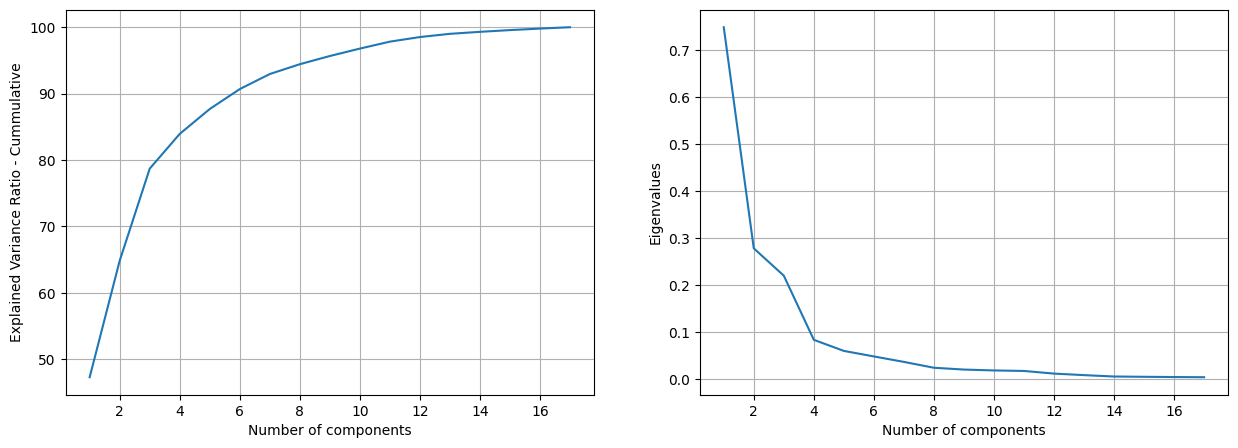

In [171]:
# Implement PCA
pca_check=PCA()
check_df = make_pipeline(drop_column, preprocessing_pipeline, pca_check)
pca_check_result = check_df.fit(df)
fitted_pca = pca_check_result[-1]

# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 18), np.cumsum(fitted_pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 18), fitted_pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

## Find the best hyperparameter

In [172]:
# Check the value of `min_samples`
check_df = check_df.transform(df)
min_samples = check_df.shape[1]+1
print('min_samples : ', min_samples)

min_samples :  18


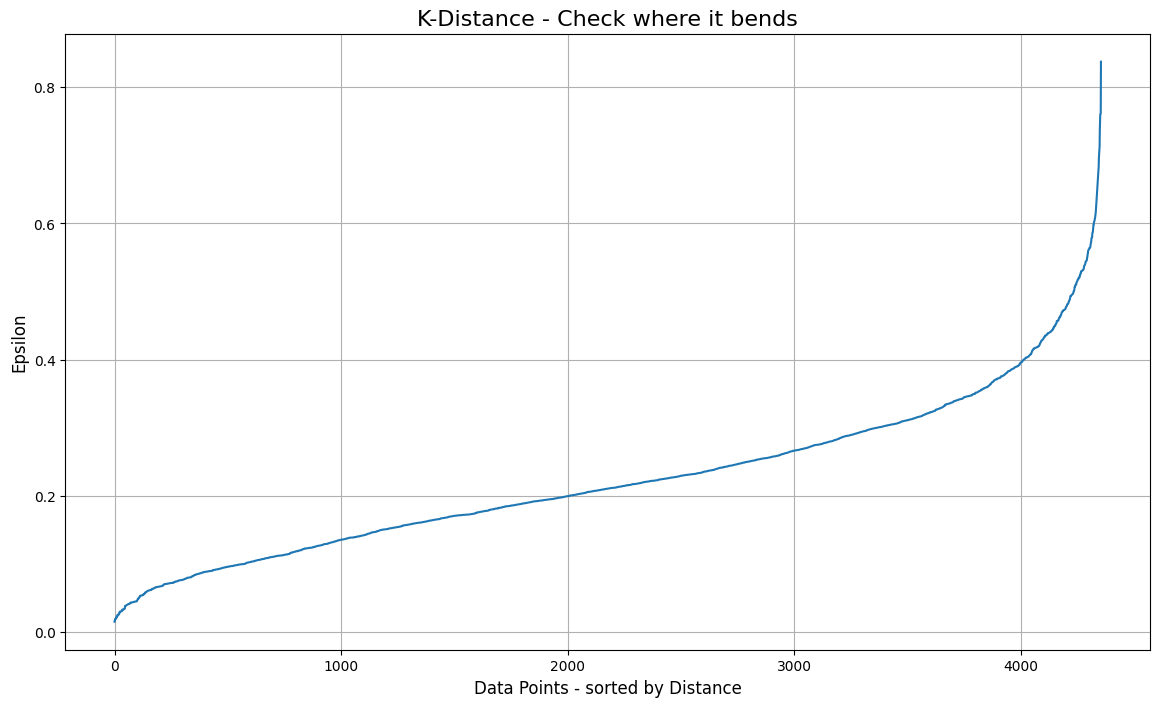

In [173]:
#Let's explore the data and work out a better setting
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=min_samples)
nbrs = neigh.fit(check_df)
distances, indices = nbrs.kneighbors(check_df)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(14,8))
plt.grid()
plt.plot(distances)
plt.title('K-Distance - Check where it bends',fontsize=16)
plt.xlabel('Data Points - sorted by Distance',fontsize=12)
plt.ylabel('Epsilon', fontsize=12)
plt.show()

We want to retain 95% data. From this consideration, we can see 95% variance ratio will contain with 9 components and they have eigenvalues less than 0.1

# VI. Model Definition

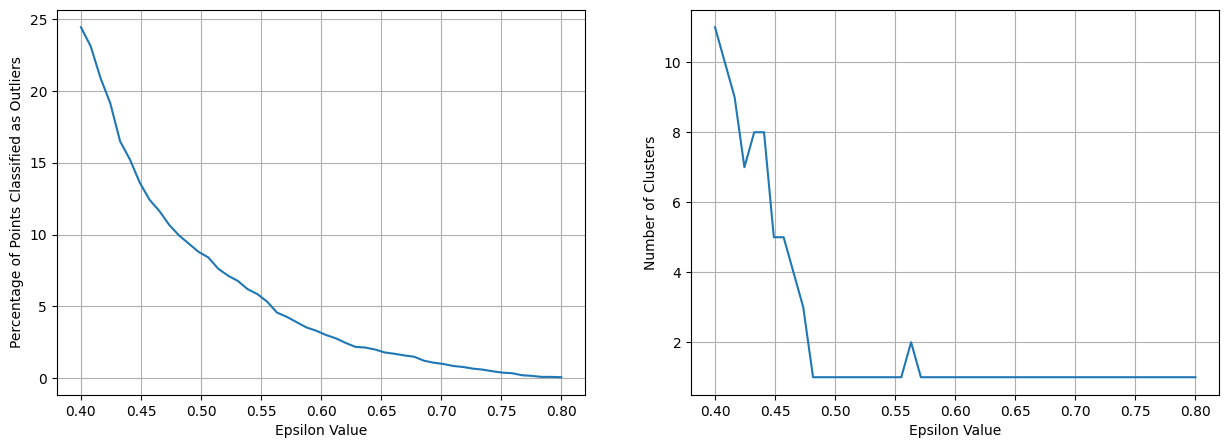

In [174]:
# Let's check the number of outliers with different eps
from sklearn.cluster import DBSCAN

## Define the `eps`
start_eps = 0.4
end_eps = 0.8
number_eps = 50 # Number of `eps` combination to try
outlier_percent = []
clusters_size = []

## Start looping
for eps in np.linspace(start_eps, end_eps, number_eps):

    ## Create Model
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(check_df)

    ## Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

    ## Get cluster size
    n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)

    outlier_percent.append(perc_outliers)
    clusters_size.append(n_clusters)

## Plot the effect of different epsilons
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(np.linspace(start_eps, end_eps, number_eps), outlier_percent)
plt.xlabel("Epsilon Value")
plt.ylabel("Percentage of Points Classified as Outliers")

plt.subplot(1, 2, 2)
plt.grid()
plt.plot(np.linspace(start_eps, end_eps, number_eps), clusters_size)
plt.xlabel("Epsilon Value")
plt.ylabel("Number of Clusters")

plt.show()

# VII. Model Training

In [175]:
# DBSCAN Training
from sklearn.cluster import DBSCAN

# Determine PCA contained 95% information
pca_train = PCA(n_components=0.95)

# Pipeline
best_dbscan = DBSCAN(eps=0.4, min_samples=min_samples)
dbscan_train = make_pipeline(drop_column, preprocessing_pipeline, pca_train, best_dbscan)

# Train Model
pred = dbscan_train.fit_predict(df)
pred

array([ 0,  0,  0, ...,  1,  1, -1], dtype=int64)

# VIII. Model Evaluation

In [ ]:
# Prepare Dataset
df_result=df.copy()
df_result=pd.DataFrame(imputer.fit_transform(df_result))

# Input Result into Dataset
df_result['CLUSTER'] = pred
df_result.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,1987.0,21.881528,1.000000,89.04,89.04,0.00,0.0,0.083333,0.083333,0.000000,0.0,0.0,1.0,2500.0,193.985335,96.885791,0.0,12.0,0
2,4903.0,8.570991,0.272727,149.55,149.55,0.00,0.0,0.083333,0.083333,0.000000,0.0,0.0,1.0,5000.0,447.377119,97.176376,0.0,12.0,0
3,7431.0,1409.206763,1.000000,143.50,143.50,0.00,0.0,0.083333,0.083333,0.000000,0.0,0.0,1.0,3000.0,432.361276,300.764907,0.0,12.0,0
4,7979.0,810.739995,1.000000,86.90,86.90,0.00,0.0,0.083333,0.083333,0.000000,0.0,0.0,1.0,7500.0,253.775702,210.961925,0.0,12.0,0
5,2279.0,558.476701,1.000000,630.03,630.03,0.00,0.0,0.090909,0.090909,0.000000,0.0,0.0,1.0,5500.0,426.092563,213.369694,0.0,11.0,0
6,4049.0,1714.896284,1.000000,2000.00,2000.00,0.00,0.0,0.111111,0.111111,0.000000,0.0,0.0,1.0,2000.0,448.300443,348.836471,0.0,9.0,0
7,133.0,271.051660,0.909091,86.00,0.00,86.00,0.0,0.166667,0.000000,0.166667,0.0,0.0,2.0,1000.0,442.141178,2863.640612,0.0,12.0,0
8,2185.0,98.364739,0.181818,65.00,0.00,65.00,0.0,0.166667,0.000000,0.166667,0.0,0.0,2.0,1200.0,718.794328,53.655347,0.0,12.0,0
9,2891.0,907.371097,1.000000,55.65,0.00,55.65,0.0,0.166667,0.000000,0.166667,0.0,0.0,3.0,1000.0,416.818116,603.735158,0.0,12.0,0
10,703.0,44.539341,0.363636,94.30,71.80,22.50,0.0,0.250000,0.083333,0.250000,0.0,0.0,4.0,2500.0,940.026302,147.851745,0.0,12.0,0


<Axes: >

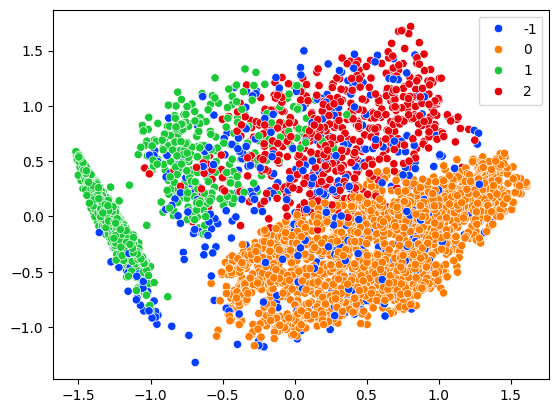

In [177]:
data_2d = dbscan_train[:-1].fit_transform(df)

sns.scatterplot(
    x=data_2d[:, 0], 
    y=data_2d[:, 1], 
    hue=pred, 
    palette='bright'
)

In [178]:
# Define columns' list without CLUSTER and CUST_ID
cols = df_result.drop(columns=['CLUSTER','CUST_ID']).columns.tolist()

# Determine mean as default aggregation function
agg_dict = {col: 'mean' for col in cols}

# Adjust for TENURE using median because it is discrete column
if 'TENURE' in agg_dict:
    agg_dict['TENURE'] = 'median'

# Make table for aggregation value
profil_cluster = df_result.groupby('CLUSTER').agg(agg_dict)
profil_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CLUSTER,,,,,,,,,,,,,,,,,
-1,992.013587,0.730173,1116.276560,742.129610,374.192821,1236.694436,0.539332,0.273050,0.337731,0.180915,4.385321,13.717890,4313.348624,1966.651306,539.700379,0.293990,10.0
0,822.096986,0.865935,1379.909614,804.643235,575.728028,0.000000,0.678559,0.257454,0.520043,0.000000,0.000000,19.979514,4349.995549,1518.252994,636.670543,0.237314,12.0
1,2402.658487,0.934084,151.935213,151.947200,0.015394,2064.229638,0.063966,0.063834,0.000066,0.281701,6.638013,1.687697,4339.212312,1747.616202,1077.879040,0.023984,12.0
2,3059.268297,0.986742,1577.988714,786.104873,791.883841,2078.673136,0.768555,0.275132,0.669510,0.285142,7.498188,29.213768,5606.068841,2747.408978,1519.764235,0.028148,12.0


From analyzing all feature, for simplifying analysis, we would take more attention for these features:
 - BALANCE
 - PRC FULL PAYMENT
 - ONEOFF vs INSTALLMENT vs CASH ADVANCED

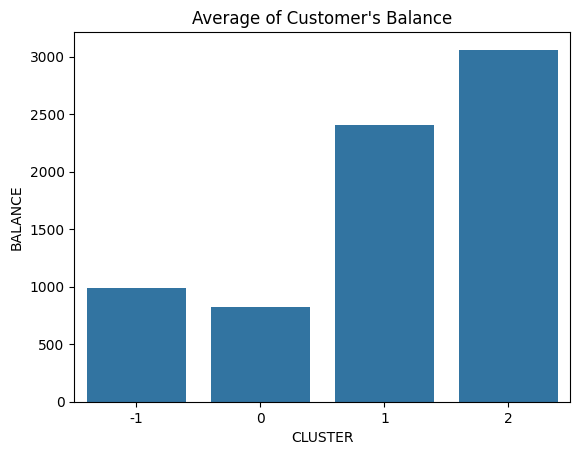

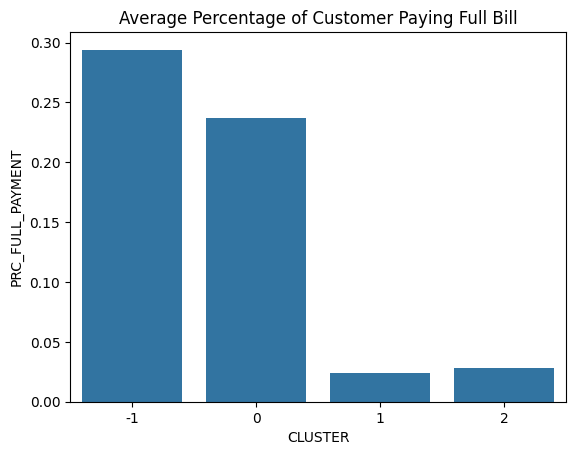

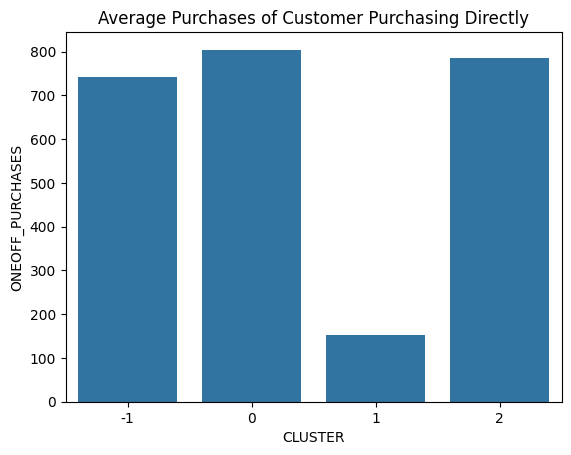

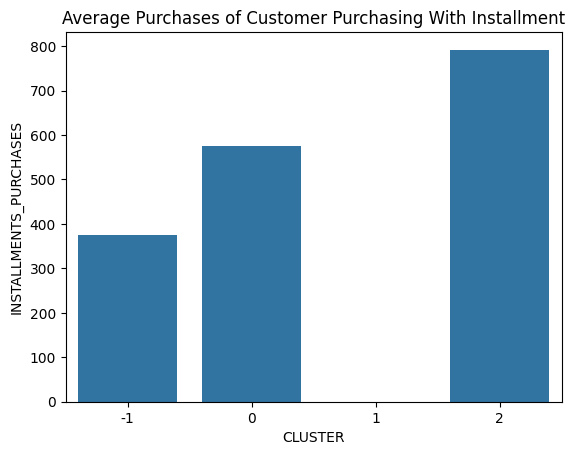

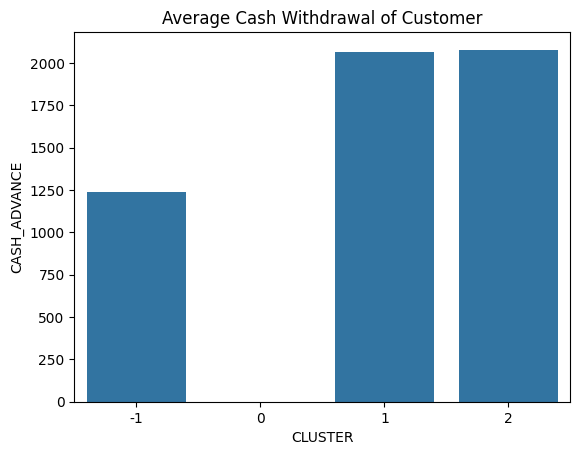

In [179]:
# Visualize BALANCE
sns.barplot(x=profil_cluster.index, y=profil_cluster['BALANCE'])
plt.title("Average of Customer's Balance")
plt.show()

# Visualize PRC_FULL_PAYMENT
sns.barplot(x=profil_cluster.index, y=profil_cluster['PRC_FULL_PAYMENT'])
plt.title('Average Percentage of Customer Paying Full Bill')
plt.show()

# Visualize ONEOFF_PURCHASES
sns.barplot(x=profil_cluster.index, y=profil_cluster['ONEOFF_PURCHASES'])
plt.title('Average Purchases of Customer Purchasing Directly')
plt.show()

# Visualize INSTALLMENTS_PURCHASES
sns.barplot(x=profil_cluster.index, y=profil_cluster['INSTALLMENTS_PURCHASES'])
plt.title('Average Purchases of Customer Purchasing With Installment')
plt.show()

# Visualize CASH_ADVANCE
sns.barplot(x=profil_cluster.index, y=profil_cluster['CASH_ADVANCE'])
plt.title('Average Cash Withdrawal of Customer')
plt.show()

In [180]:
# Make new columns for total expense
profil_cluster['TOTAL_EXPENSE'] = profil_cluster['ONEOFF_PURCHASES'] + profil_cluster['INSTALLMENTS_PURCHASES'] + profil_cluster['CASH_ADVANCE']

# Make new columns for displaying proportion of spend behavior
profil_cluster['% of ONEOFF_PURCHASES'] = (profil_cluster['ONEOFF_PURCHASES'] / profil_cluster['TOTAL_EXPENSE']) * 100
profil_cluster['% of INSTALLMENTS_PURCHASES'] = (profil_cluster['INSTALLMENTS_PURCHASES'] / profil_cluster['TOTAL_EXPENSE']) * 100
profil_cluster['% of CASH_ADVANCE'] = (profil_cluster['CASH_ADVANCE'] / profil_cluster['TOTAL_EXPENSE']) * 100

# Define columns to display by table
result_cols = [
    'BALANCE', 'PRC_FULL_PAYMENT', 'TOTAL_EXPENSE', 
    '% of ONEOFF_PURCHASES', '% of INSTALLMENTS_PURCHASES', '% of CASH_ADVANCE']

profil_analysis = profil_cluster[result_cols]
profil_analysis

,BALANCE,PRC_FULL_PAYMENT,TOTAL_EXPENSE,% of ONEOFF_PURCHASES,% of INSTALLMENTS_PURCHASES,% of CASH_ADVANCE
CLUSTER,,,,,,
-1,992.013587,0.293990,2353.016868,31.539494,15.902683,52.557823
0,822.096986,0.237314,1380.371263,58.291798,41.708202,0.000000
1,2402.658487,0.023984,2216.192233,6.856228,0.000695,93.143077
2,3059.268297,0.028148,3656.661850,21.497883,21.655922,56.846195


# IX. Model Saving

In [181]:
# Saving Model
with open('deployment/dbscan_model.pkl', 'wb') as a:
    dill.dump(dbscan_train, a)